Most frequent positive words:
[('the', 898), ('to', 836), ('a', 718), ('I', 548), ('is', 515), ('and', 486), ('my', 429), ('for', 427), ('you', 422), ('in', 383)]
Most frequent negative words:
[('to', 1655), ('I', 1425), ('the', 1327), ('my', 1125), ('i', 1016), ('a', 996), ('and', 734), ('is', 721), ('in', 625), ('of', 610)]


Text(0,0.5,'frequency')

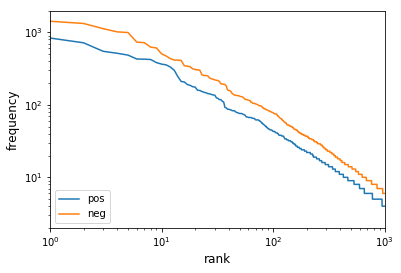

In [133]:
#matplotlib inline 


import csv
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np

TOTAL = 10000   # number of messages included in analysis

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts


#main
with open('Sentiment Analysis Dataset.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    reader.next()
    pos = ""
    neg = ""
    for i in range(TOTAL):
        row = reader.next()
        if row[1] == '0':
            neg += row[3]
        else:
            pos += row[3]

#print word_count(pos)
    # split() returns list of all the words in the string 
split_pos = pos.split() 
split_neg = neg.split() 

# Pass the split_it list to instance of Counter class. 
Counter_pos = Counter(split_pos) 
Counter_neg = Counter(split_neg) 

# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_10pos = Counter_pos.most_common(10) 
most_10neg = Counter_neg.most_common(10) 

print "Most frequent positive words:"
print(most_10pos) 
print "Most frequent negative words:"
print(most_10neg) 

most_pos = Counter_pos.most_common(1000) 
most_neg = Counter_neg.most_common(1000) 

most_zipf_pos = [tuple[1] for tuple in most_pos]
most_zipf_neg = [tuple[1] for tuple in most_neg]

plt.loglog(most_zipf_pos,label = 'pos')
plt.loglog(most_zipf_neg,label = 'neg')

plt.axis([1, 1000, 2, 2000])
plt.legend(loc='upper right') 

plt.legend(loc='lower left') 
plt.xlabel('rank',fontsize=12) 
plt.ylabel('frequency',fontsize=12) 


In [134]:
# Prediction of Twitter Sentiment using Logistic Regression
#
# Twitter messages are vectorized according to a vocabulary of the most frequent words.
# The classifiier uses Logistic Regression. It is trained and then tested with a  subset 
# of messages. With a total number of 10000 messages we obtain more than 75% accuracy already.
#
# This simple method provides a baseline for more advanced methods for prediction. For instance,
# we could use Neural Networks for a second approach. For that one could use word embedding
# the order of words is captured and used for informatiuon retrieval. This could substantially
# improve accuracy.


#  Please run previous cell first!
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

with open('Sentiment Analysis Dataset.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    reader.next()


#use all of the first TOTAL messages

#generate vocabulary
    vectorizer = CountVectorizer(min_df=0, lowercase=False)
    vectorizer.fit(split_pos+split_neg)                                 
    vectorizer.vocabulary_

    set = [reader.next() for i in range(TOTAL)]
    sentences = [row[3] for row in set]
    y = [row[1] for row in set]
    
# splot into train and test set
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

#vectorize using the vocabulary
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    X_train

# train the classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)

    print("Accuracy:", score)

('Accuracy:', 0.7548)
